# 1.Chuẩn bị 

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('shopping_trends.csv')
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


# 2. Kiểm tra  

In [5]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


-> Insight:

**Age:**

Phần lớn khách hàng nằm trong độ tuổi từ 31 đến 57, với tuổi trung bình là 44.

Có sự chênh lệch lớn về độ tuổi của khách hàng, thể hiện qua độ lệch chuẩn cao là 15,21.

Trong số tất cả khách hàng, 25% dưới 31 tuổi, 50% ở độ tuổi 44 và 75% dưới 57 tuổi.

**Purchase Amount:**

Số tiền mua hàng của khách dao động từ 20 USD đến 100 USD, với mức trung bình là 60 USD.

Trong số tất cả khách hàng, 25% chi ít hơn 39 USD, 50% chi 60 USD, và 75% chi ít hơn 81 USD.

**Previous Purchase:**

Khách hàng đã thực hiện từ 1 đến 50 lần mua hàng, với trung bình mỗi khách hàng thực hiện khoảng 25 giao dịch.

25% khách hàng đã mua 13 lần hoặc ít hơn, 50% (trung vị) đã mua 25 lần, và 75% đã mua 38 lần hoặc ít hơn.

## Kiểm tra dữ liệu thiếu 

In [17]:
# Kiểm tra xem có giá trị nào bị thiếu không
missing_values = df.isnull().sum()

# In ra các cột có giá trị bị thiếu
print(missing_values[missing_values > 0])

# Điền giá trị thiếu bằng cách sử dụng từ điển
df.fillna({'Age': df['Age'].mean()}, inplace=True)

Series([], dtype: int64)


# 3. Tổng quan về " Subscription Status"

In [41]:
# Hiển thị các giá trị duy nhất trong cột "Subscription Status"
print(df['Subscription Status'].unique())


['Yes' 'No']


In [42]:
# Đếm số lượng mỗi giá trị của "Subscription Status"
print(df['Subscription Status'].value_counts())


Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64


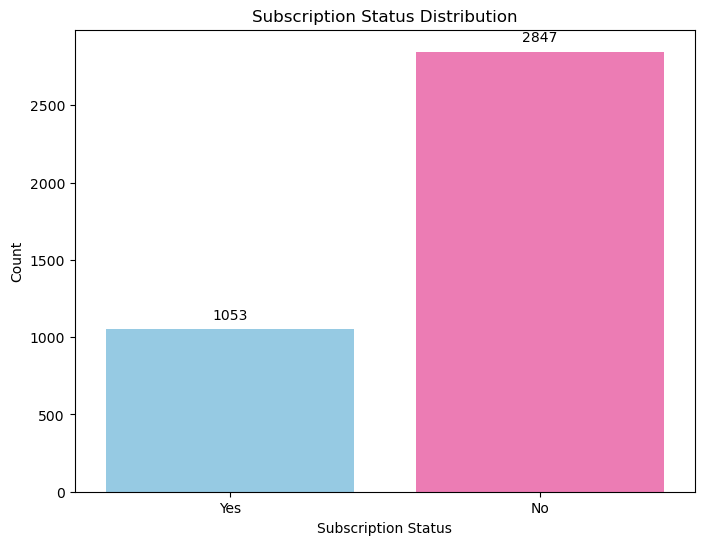

In [43]:

colors = ["#89CFF0", "#FF69B4"]  

plt.figure(figsize=(8, 6))


ax = sns.countplot(x='Subscription Status', hue='Subscription Status', data=df, palette=colors, legend=False)

plt.title('Subscription Status Distribution')
plt.xlabel('Subscription Status')
plt.ylabel('Count')


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.show()


# 4. Phân tích đa biến 

## 4.1 Tương quan "Subscription Status" và "Age"

In [47]:
# Xem độ tuổi nhỏ nhất và lớn nhất
min_age = df['Age'].min()
max_age = df['Age'].max()

print(f"Độ tuổi nhỏ nhất: {min_age}")
print(f"Độ tuổi lớn nhất: {max_age}")


Độ tuổi nhỏ nhất: 18
Độ tuổi lớn nhất: 70


In [48]:
# Chia độ tuổi thành các nhóm
bins = [18, 25, 35, 45, 55, 65, 70]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-70']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Hiển thị một vài dòng của cột Age và Age Group
df[['Age', 'Age Group']].head()


,Age,Age Group
0,55,56-65
1,19,18-25
2,50,46-55
3,21,18-25
4,45,46-55


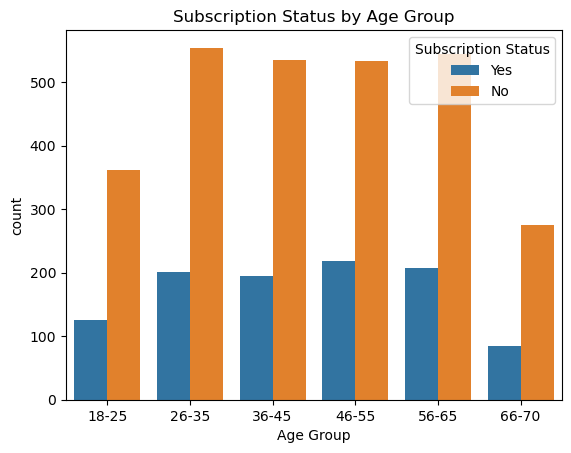

In [49]:
# Vẽ biểu đồ cột cho Age Group và Subscription Status
sns.countplot(x='Age Group', hue='Subscription Status', data=df)
plt.title('Subscription Status by Age Group')
plt.show()


Nhóm tuổi 18-25: Tỉ lệ khách hàng đăng ký có thể thấp hơn so với các nhóm tuổi lớn hơn, vì nhóm này có thể ít có khả năng tài chính hoặc ít quan tâm đến việc đăng ký dài hạn.
Nhóm tuổi 26-65: Đây có thể là nhóm có tỉ lệ đăng ký cao nhất, do nhóm này có thu nhập ổn định và có nhu cầu sử dụng nhiều dịch vụ.
Nhóm tuổi 66-70: Nhóm này có thể có tỉ lệ đăng ký thấp hơn vì họ ít có nhu cầu hoặc không quen với các dịch vụ trực tuyến.

## 4.2.Tương quan "Subscription Status" và "Gender"

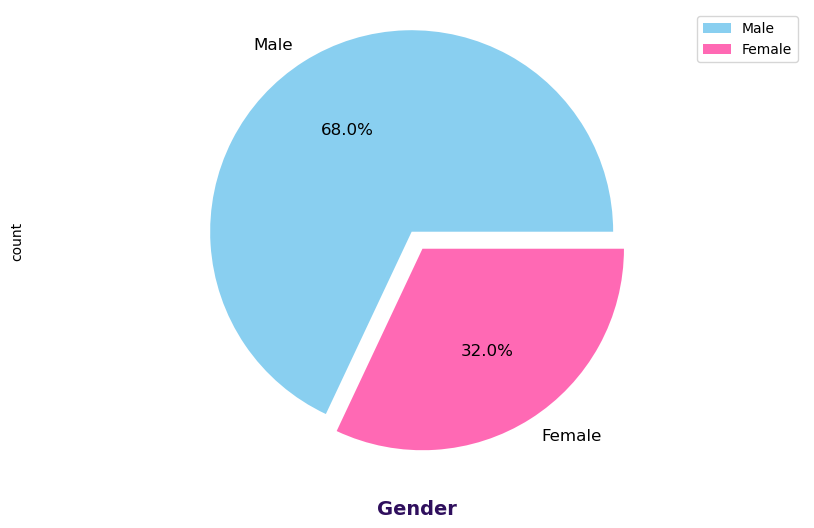

In [51]:
plt.figure(figsize = (10, 6))

counts = df["Gender"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [52]:
# Tạo bảng tóm tắt
subscription_gender = df.groupby(['Gender', 'Subscription Status']).size().unstack()

# Tính tỉ lệ
subscription_gender_percentage = subscription_gender.div(subscription_gender.sum(axis=1), axis=0) * 100

print(subscription_gender)
print(subscription_gender_percentage)


Subscription Status      No     Yes
Gender                             
Female               1248.0     NaN
Male                 1599.0  1053.0
Subscription Status          No        Yes
Gender                                    
Female               100.000000        NaN
Male                  60.294118  39.705882


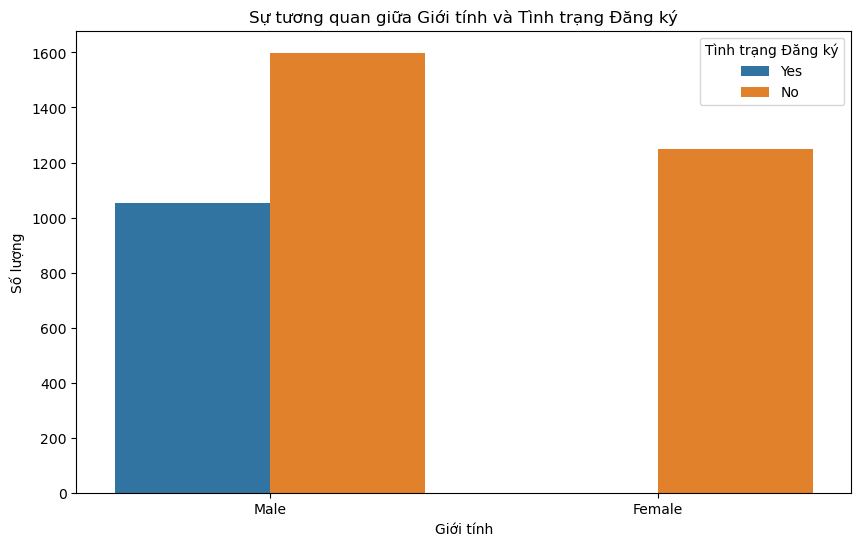

In [53]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', hue='Subscription Status')

plt.title('Sự tương quan giữa Giới tính và Tình trạng Đăng ký')
plt.xlabel('Giới tính')
plt.ylabel('Số lượng')
plt.legend(title='Tình trạng Đăng ký', loc='upper right')

plt.show()

-> Dựa trên các kết quả trên, chúng ta có thể rút ra một số kết luận sau:

Giới tính Nữ có vẻ như không có ai trong số họ đã đăng ký. Điều này có thể chỉ ra rằng sản phẩm hoặc dịch vụ đang phân tích không thu hút được phụ nữ hoặc có thể có vấn đề trong cách tiếp cận marketing đến họ.

Giới tính Nam có tỉ lệ đăng ký khá cao, với khoảng 39.71% trong số họ đã chọn đăng ký. Điều này cho thấy rằng có một số yếu tố có thể đang thúc đẩy nam giới tham gia vào dịch vụ hoặc sản phẩm này.

### Nguyên nhân 

In [12]:
mean_purchase_by_gender = df.groupby(['Gender', 'Subscription Status'])['Purchase Amount (USD)'].mean()

print("Chi tiêu trung bình theo giới tính và trạng thái đăng ký:")
print(mean_purchase_by_gender)

Chi tiêu trung bình theo giới tính và trạng thái đăng ký:
Gender  Subscription Status
Female  No                     60.249199
Male    No                     59.565353
        Yes                    59.491928
Name: Purchase Amount (USD), dtype: float64


-> Chi Tiêu Trung Bình:

Chi tiêu trung bình của cả hai giới tính cho trạng thái đăng ký "No" (không đăng ký) gần như tương đương, với nữ có chút ưu thế về chi tiêu (60.25 USD so với 59.57 USD của nam).
Tuy nhiên, chi tiêu trung bình của nam cho trạng thái "Yes" (đăng ký) là 59.49 USD, thấp hơn so với cả hai nhóm nữ và nam không đăng ký.

Kết Luận: Mặc dù nam giới có xu hướng chi tiêu nhiều hơn trong trạng thái không đăng ký, chi tiêu của họ lại không đủ cao để tạo ra sự khác biệt lớn khi họ quyết định đăng ký.
Chi tiêu trung bình của nam giới cho trạng thái đăng ký thấp hơn so với nữ và không vượt qua mức chi tiêu của nữ trong trạng thái không đăng ký. 

Điều này có thể cho thấy rằng nam giới có thể không cảm thấy đủ giá trị hoặc lợi ích từ việc đăng ký, mặc dù họ chi tiêu một cách tương tự hoặc gần bằng.

-> Kết quả hiện tại cho thấy rằng mặc dù nam giới có thể chi tiêu gần tương đương với nữ giới, họ vẫn chưa thấy lý do để đăng ký dịch vụ.

In [55]:
df['Frequency of Purchases'].unique()

array(['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly',
       'Monthly', 'Every 3 Months'], dtype=object)

In [56]:
subscription_frequency_analysis = df.groupby(['Gender', 'Frequency of Purchases', 'Subscription Status']).size().unstack(fill_value=0)
subscription_frequency_percentage = subscription_frequency_analysis.div(subscription_frequency_analysis.sum(axis=1), axis=0) * 100

print(subscription_frequency_percentage)


Subscription Status                    No        Yes
Gender Frequency of Purchases                       
Female Annually                100.000000   0.000000
       Bi-Weekly               100.000000   0.000000
       Every 3 Months          100.000000   0.000000
       Fortnightly             100.000000   0.000000
       Monthly                 100.000000   0.000000
       Quarterly               100.000000   0.000000
       Weekly                  100.000000   0.000000
Male   Annually                 58.656331  41.343669
       Bi-Weekly                61.002786  38.997214
       Every 3 Months           61.306533  38.693467
       Fortnightly              59.630607  40.369393
       Monthly                  59.510870  40.489130
       Quarterly                64.467005  35.532995
       Weekly                   57.220708  42.779292


-> Nữ giới (Female):

Tỉ lệ đăng ký của nữ giới cho tất cả các tần suất mua hàng đều là 0% trong nhóm đăng ký (Yes). Điều này cho thấy rằng không có khách hàng nữ nào trong dataset này đã đăng ký sử dụng dịch vụ hoặc sản phẩm.
Nữ giới có vẻ không có hứng thú hoặc không thấy giá trị trong việc đăng ký dịch vụ.

->Nam giới (Male):
Tỉ lệ đăng ký của nam giới thay đổi tùy thuộc vào tần suất mua hàng. Ví dụ:
Với tần suất Annually, khoảng 41.34% nam giới đã đăng ký.
Với tần suất Weekly, tỷ lệ đăng ký đạt tới 42.78%.
Nam giới có sự quan tâm hơn đến việc đăng ký dịch vụ hoặc sản phẩm, với tỷ lệ dao động từ khoảng 35.53% (Quarterly) đến 42.78% (Weekly).


-> Giải thích sự chênh lệch tỉ lệ đăng ký giữa Male và Female:
Sự chênh lệch rõ ràng về sự quan tâm:

- Nữ giới có thể không thấy lợi ích hoặc giá trị trong việc đăng ký, có thể do:
Sản phẩm hoặc dịch vụ không phù hợp với nhu cầu của họ.
Thiếu thông tin hoặc động lực để đăng ký.
- Nam giới có xu hướng đăng ký nhiều hơn:

Nam giới có vẻ cởi mở hơn đối với việc đăng ký, đặc biệt là với các tần suất cao hơn như Weekly hoặc Annually.
Có thể do họ có nhu cầu cao hơn trong việc sử dụng dịch vụ thường xuyên hoặc có ý định mua sắm dài hạn hơn.
Tần suất mua hàng ảnh hưởng đến quyết định đăng ký:

Tỉ lệ đăng ký của nam giới cho thấy rằng khi họ mua sắm với tần suất cao hơn (như Weekly), họ có khả năng đăng ký cao hơn. Điều này có thể liên quan đến hành vi tiêu dùng và thói quen mua sắm của họ.

4.3 Tương quan của "Location" và "Subscription Status"

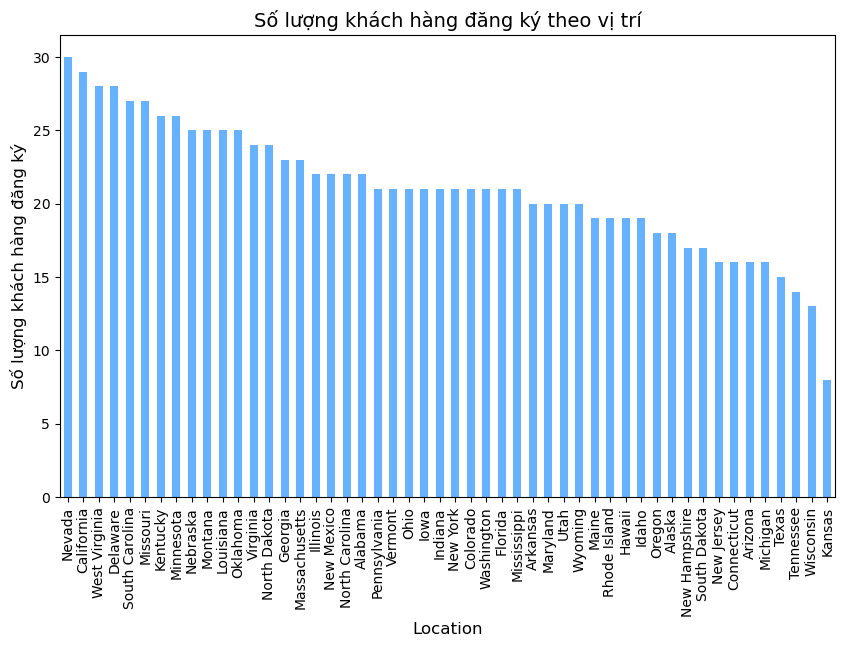

In [16]:
# Lọc dữ liệu chỉ bao gồm những khách hàng có Subscription Status là 'Yes'
df_yes = df[df['Subscription Status'] == 'Yes']

# Tính số lượng khách hàng đăng ký theo vị trí
subscription_by_location = df_yes['Location'].value_counts()

# Vẽ biểu đồ bar để hiển thị số lượng khách hàng đăng ký theo vị trí
plt.figure(figsize=(10, 6))
subscription_by_location.plot(kind='bar', color='#66B2FF')

# Thêm tiêu đề và nhãn
plt.title('Số lượng khách hàng đăng ký theo vị trí', fontsize=14)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Số lượng khách hàng đăng ký', fontsize=12)

# Hiển thị biểu đồ
plt.show()